Ce notebook vise à nettoyer les datasets concernant les joueurs de tennis 

Sources : Open data

Resprésentant les informations des joueurs(nom, prènom, age,main_utilisée... ), leurs classements (ranking_points, titles, totalpoints, ... )

In [9]:
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
from datetime import datetime
import re


1.  'Kaggle players' 

In [180]:
df_ply = pd.read_csv('KagglePlayers.csv')
df_ply['birthdate'] = pd.to_datetime(df_ply['birthdate'], format='%Y%m%d', errors='coerce')
current_date = datetime.now()
df_ply['age'] = current_date.year - df_ply['birthdate'].dt.year
df_ply.loc[df_ply['birthdate'].dt.month > current_date.month, 'age'] -= 1
df_ply

,player_id,name_first,name_last,hand,birthdate,country,gender,age
0,100001,Gardnar,Mulloy,R,1913-11-22,USA,male,110.0
1,100002,Pancho,Segura,R,1921-06-20,ECU,male,102.0
2,100003,Frank,Sedgman,R,1927-10-02,AUS,male,96.0
3,100004,Giuseppe,Merlo,R,1927-10-11,ITA,male,96.0
4,100005,Richard Pancho,Gonzales,R,1928-05-09,USA,male,96.0
...,...,...,...,...,...,...,...,...
88742,233744,Sara,Donnini,U,NaT,ITA,female,NaN
88743,233745,Michelle,Dzjachangirova,U,NaT,NLD,female,NaN
88744,233746,Andjela,Lopicic,U,NaT,SRB,female,NaN
88745,233747,Nina,Vargova,U,NaT,SVK,female,NaN


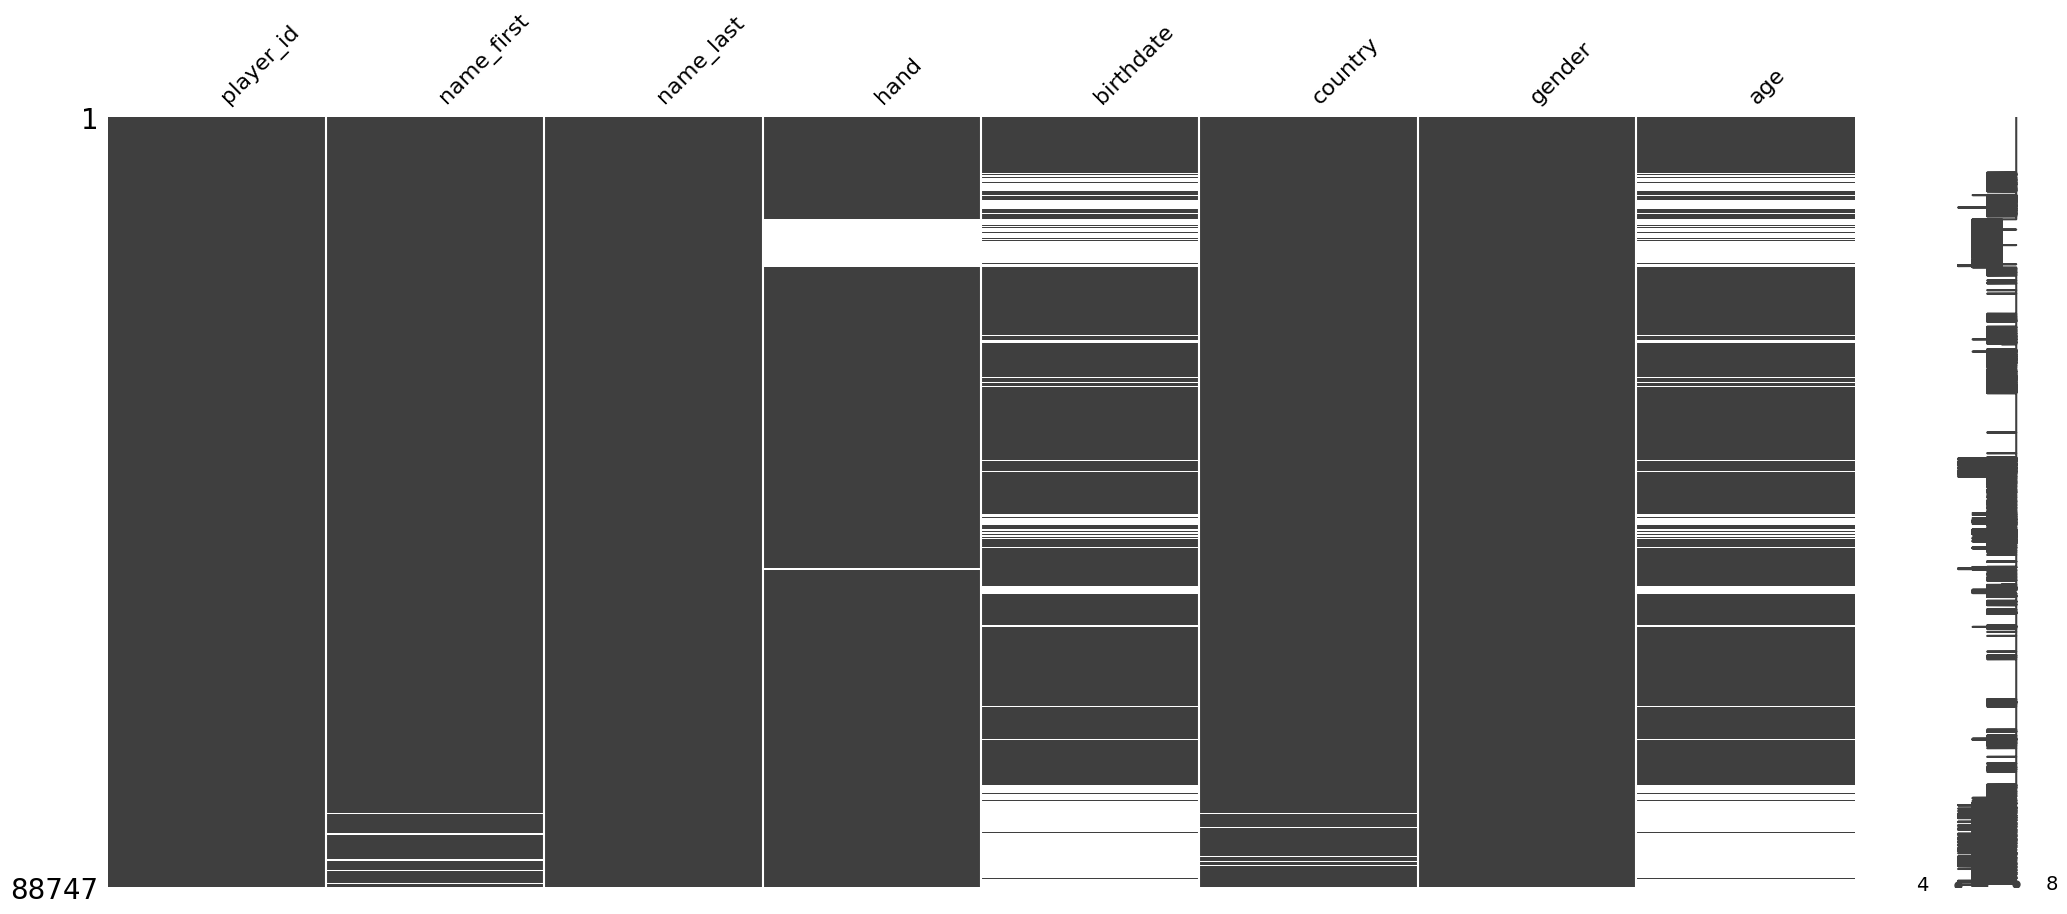

In [181]:
msno.matrix(df_ply)
plt.show()

In [182]:
df_ply.to_csv('KagglePlayers_nettoye.csv')

---------------------------------------------------      Fin Kaggle players    --------------------------------------------------------------------------------------------------------------

2. Dataset 'GOATList' 

In [23]:
df_gt = pd.read_csv('GOATList.csv')
df_gt.head()

,rank,name,country_name,country_id,active,dob,totalPoints,tournamentPoints,rankingPoints,achievementsPoints,...,altFinals,masters,olympics,bigTitles,titles,weeksAtNo1,wonLost,bestEloRating,bestEloRatingDate,wonPct
0,1,Novak Djokovic,Serbia,SRB,True,1987-05-22,1102,595,241,266,...,0,40,0,71,98,404,1084-210,2629,2016-02-01,83.8%
1,2,Roger Federer,Switzerland,SUI,False,1981-08-08,924,566,200,158,...,0,28,0,54,103,310,1245-275,2550,2007-03-05,81.9%
2,3,Rafael Nadal,Spain,ESP,False,1986-06-03,885,526,186,173,...,0,36,1,59,92,209,1066-219,2552,2013-09-09,83.0%
3,4,Jimmy Connors,United States,USA,False,1952-09-02,616,402,151,63,...,2,20,0,31,109,268,1275-285,2521,1978-10-29,81.7%
4,5,Ivan Lendl,United States,USA,False,1960-03-07,604,395,141,68,...,2,18,0,33,94,270,1069-242,2518,1986-03-24,81.5%


In [24]:
df_gt['active'] = df_gt['active'].replace({True: 1, False: 0})
df_gt.fillna(0, inplace=True)
df_gt.to_csv('GOATList_nettoye.csv')

C:\Users\sonia\AppData\Local\Temp\ipykernel_11360\2239130314.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_gt['active'] = df_gt['active'].replace({True: 1, False: 0})


------------------------------------------------------------------------- FIN GOATLIST ------------------------------------------------------------------------------------------

3. Fusion datasets 'player_names_cols' et 'player_names_wom_cols' 

In [60]:
df1 = pd.read_csv('player_names_cols.csv')
df2 = pd.read_csv('player_names_wom_cols.csv')
if 'id' in df1.columns:
    df1.drop(columns=['id'], inplace=True)
if 'id' in df2.columns:
    df2.drop(columns=['id'], inplace=True)
df_merg = pd.concat([df1, df2])
df_merg.to_csv('playernames.csv', index=False)

In [111]:
df = pd.read_csv('playernames.csv')
df

,first_name,last_name,hand,birth_date,country_code
0,Gardnar,Mulloy,R,19131122.0,USA
1,Pancho,Segura,R,19210620.0,ECU
2,Frank,Sedgman,R,19271002.0,AUS
3,Giuseppe,Merlo,R,19271011.0,ITA
4,Richard Pancho,Gonzales,R,19280509.0,USA
...,...,...,...,...,...
72493,Aurora,Ciavarelli,U,20000717,ITA
72494,Gaia,Morganti,U,20020210,ITA
72495,Gloria,Ceschi,U,19980524,ITA
72496,Annie,Wise,U,19870905,USA


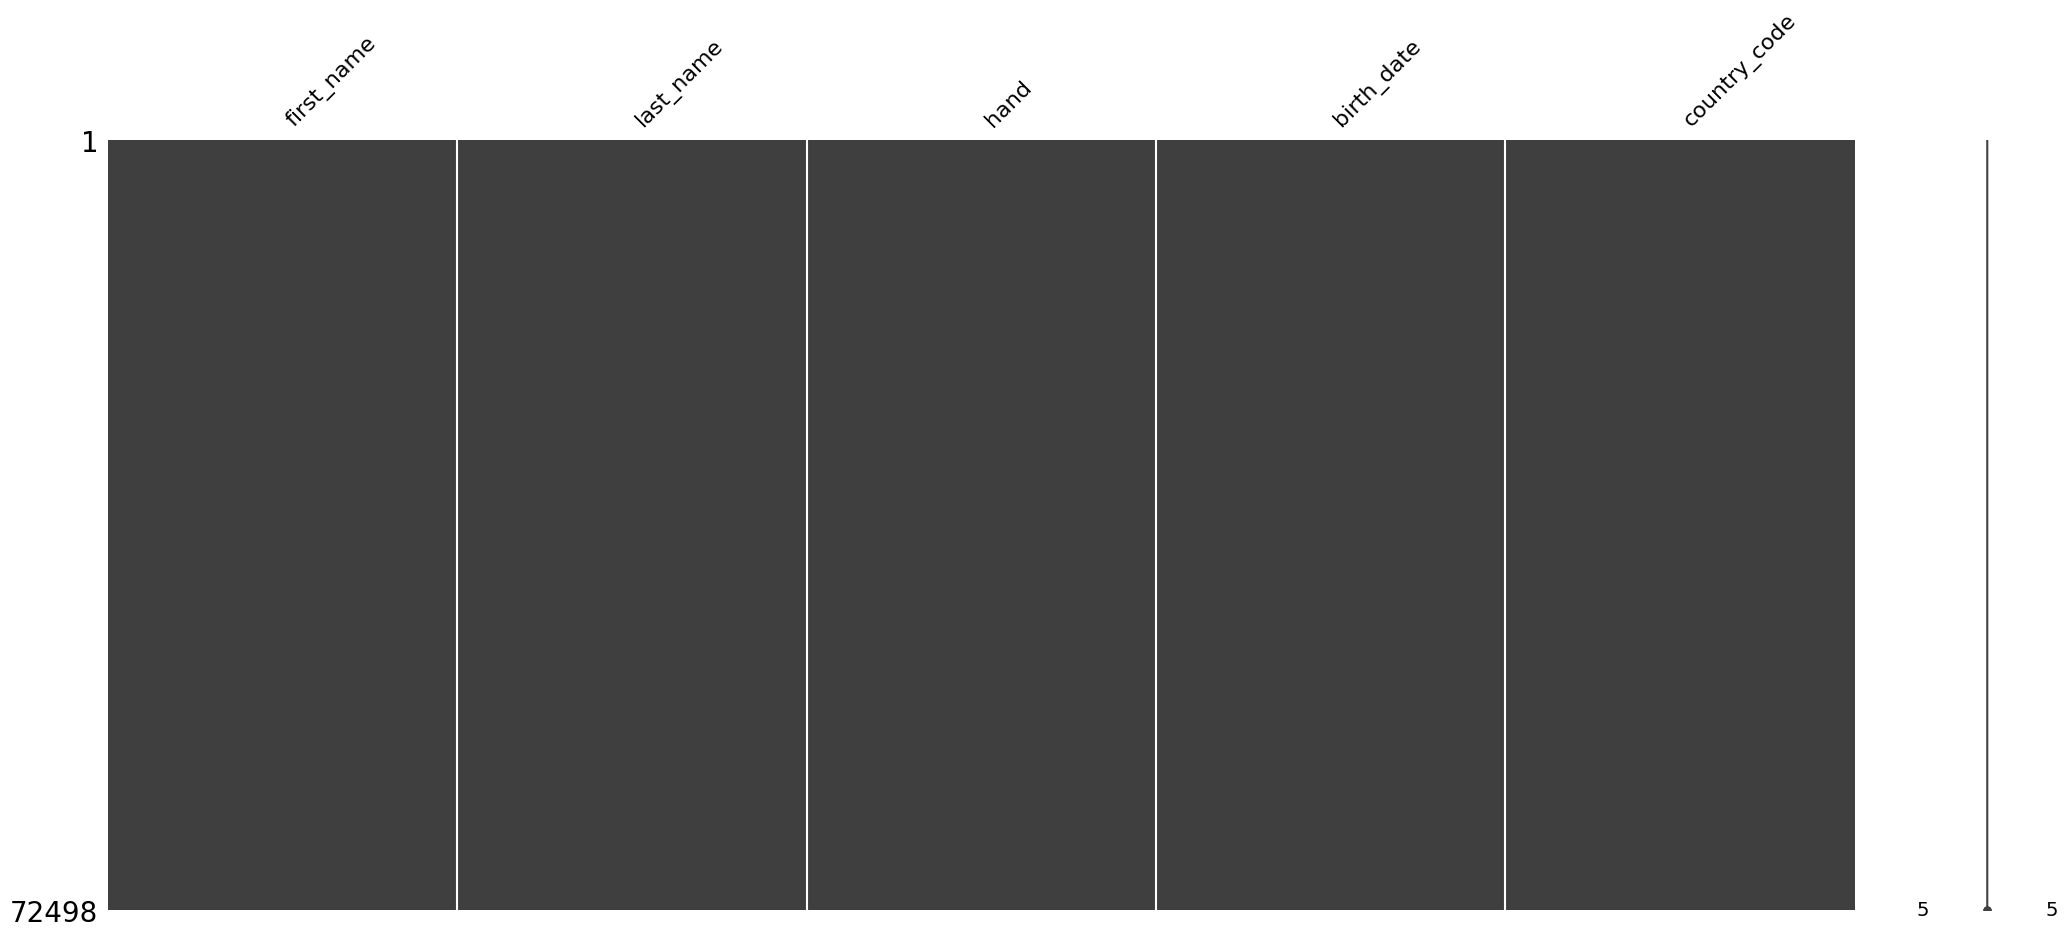

In [112]:
df.fillna(0, inplace=True)
msno.matrix(df)
plt.show()


In [113]:
df['birth_date'] = df['birth_date'].astype(str)
df['birth_date'] = df['birth_date'].str.split('.').str[0]
df['birth_date'] = df['birth_date'].str[:4] + '-' + df['birth_date'].str[4:6] + '-' + df['birth_date'].str[6:]
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df

,first_name,last_name,hand,birth_date,country_code
0,Gardnar,Mulloy,R,1913-11-22,USA
1,Pancho,Segura,R,1921-06-20,ECU
2,Frank,Sedgman,R,1927-10-02,AUS
3,Giuseppe,Merlo,R,1927-10-11,ITA
4,Richard Pancho,Gonzales,R,1928-05-09,USA
...,...,...,...,...,...
72493,Aurora,Ciavarelli,U,2000-07-17,ITA
72494,Gaia,Morganti,U,2002-02-10,ITA
72495,Gloria,Ceschi,U,1998-05-24,ITA
72496,Annie,Wise,U,1987-09-05,USA


Calculer l'age à partir de la colonne birth_date 

In [114]:
df['birth_date'] = df['birth_date'].astype(str)
df['birth_date'] = df['birth_date'].str.replace(r'(\d{4})(\d{2})(\d{2})', r'\1-\2-\3')
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce', format='%Y-%m-%d')
current_year = datetime.now().year
df['age'] = current_year - df['birth_date'].dt.year

In [118]:
df.to_csv('playernames_nettoye.csv')


-------------------------------------------------- FIN DATASET PLAYERNAMES ------------------------------------------------------------------------------------------------------------

4. Datasets 'ATP_Rank_list' et 'WTA_Rank' 

In [172]:
df3 = pd.read_csv('ATP_Rank_list.csv', encoding='latin-1')
if 'Link' in df3.columns:
    df3.drop(columns=['Link'], inplace=True)

In [173]:
df4 = pd.read_csv('WTA_Rank.csv', encoding='latin-1')
df4.drop(columns=[' Link'], inplace=True)

In [176]:
df_mer = pd.concat([df3, df4])
df_mer.to_csv('atpwta_Rank_nettoye.csv', index=False)

--------------------------------------------------------- FIN ATP/WTA datasets ------------------------------------------------------------------------------------------------------------